In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# if iskaggle:
#    !pip install -Uqq fastai duckduckgo_search
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

about to download me some things


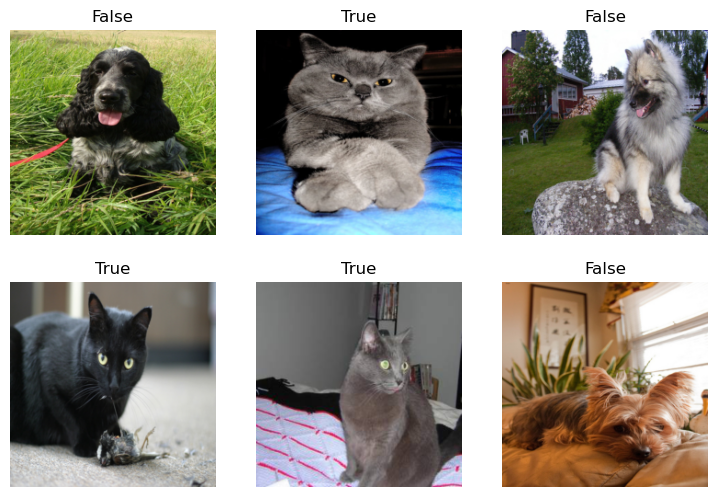

In [2]:
from fastai.vision.all import *
# how does this actually work? Why is the the first thing
# in the array uppercased only in the case of a cat?
# result: Yeah: 
# DOG: beagle_115.jpg
# CAT: 
def is_cat(x): return x[0].isupper()

print('about to download me some things')
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=[Resize(224, method='squish')])

dls.show_batch(max_n=6)
# print(get_image_files(path))


In [3]:
from fastai.vision.all import *

print('about to learn me some things')

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

about to learn me some things


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.142800,0.044201,0.015562,11:28


epoch,train_loss,valid_loss,error_rate,time
0,0.055323,0.031473,0.006089,17:31


Searching for 'bird photos'


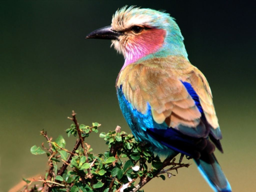

Searching for 'cat photos'


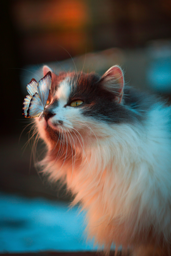

Searching for 'bear photos'


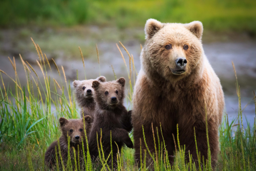

Searching for 'corgi photos'


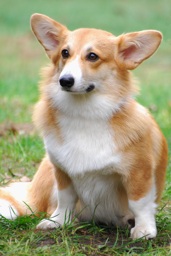

bird.jpg is a: False with probs TensorBase([0.8802, 0.1198])


cat.jpg is a: True with probs TensorBase([9.8048e-06, 9.9999e-01])


bear.jpg is a: False with probs TensorBase([0.9896, 0.0104])


corgi.jpg is a: False with probs TensorBase([9.9997e-01, 3.3448e-05])


In [4]:
from fastdownload import download_url
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

def download_image(image_type):
    return search_images(f'{image_type} photos', max_images=1)

pics = ['bird', 'cat', 'bear', 'corgi']

print('Downloading images')
for i in pics:
    urls = download_image(i)
    dest = f'{i}.jpg'
    download_url(urls[0], dest, show_progress=True)
    failed = verify_images(get_image_files(dest))    
    failed.map(Path.unlink)
    if len(failed) > 0:
        raise Exception(f'Photo for {i} failed to download.')
    display(Image.open(dest).to_thumb(256,256))

for i in pics:
    file = f'{i}.jpg'
    pet_type, _, probs = learn.predict(PILImage.create(file))
    print(f'{file} is a: {pet_type} with probs {probs}')